# Predicting Energy Production Using Machine Learning

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate LinearRegression
lr = LinearRegression()

%matplotlib inline

In [2]:
#reading in the production data
production = pd.read_csv("time_series_60min_singleindex_filtered.csv",
                        parse_dates=[0], index_col=0)

In [3]:
production.head()

,cet_cest_timestamp,interpolated_values,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,,
2016-01-01 00:00:00,2016-01-01T01:00:00+0100,NaN,0,8579
2016-01-01 01:00:00,2016-01-01T02:00:00+0100,NaN,0,8542
2016-01-01 02:00:00,2016-01-01T03:00:00+0100,NaN,0,8443
2016-01-01 03:00:00,2016-01-01T04:00:00+0100,NaN,0,8295
2016-01-01 04:00:00,2016-01-01T05:00:00+0100,NaN,0,7319


In [4]:
production.tail(3)

,cet_cest_timestamp,interpolated_values,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,,
2016-12-31 21:00:00,2016-12-31T22:00:00+0100,NaN,0,14848
2016-12-31 22:00:00,2016-12-31T23:00:00+0100,NaN,0,15056
2016-12-31 23:00:00,2017-01-01T00:00:00+0100,SK_load_entsoe_transparency,0,15422


In [5]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
cet_cest_timestamp            8784 non-null object
interpolated_values           389 non-null object
DE_solar_generation_actual    8784 non-null int64
DE_wind_generation_actual     8784 non-null int64
dtypes: int64(2), object(2)
memory usage: 343.1+ KB


In [11]:
production.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,8784.000000,8784.000000
mean,3934.747723,8766.863160
std,6032.517474,6846.410998
min,0.000000,135.000000
25%,0.000000,3617.000000
50%,121.500000,6944.000000
75%,6263.500000,11799.500000
max,26055.000000,33626.000000


(0, 35000)

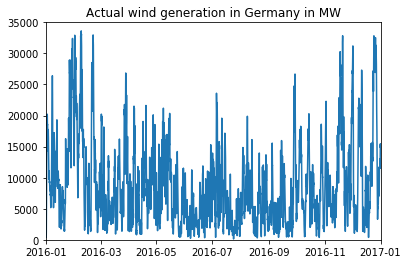

In [12]:
# create plot
plt.plot(production.index, production['DE_wind_generation_actual'])
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 35000)

In [14]:
#reading in the weather data
weather = pd.read_csv("weather_data_filtered.csv",
                     parse_dates=[0], index_col=0)

In [16]:
weather.head(5)

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,3.384917,2.064,0.0,0.0,1.73,2.05,0.0,0.0,2.45,2.03,...,0.0,0.0,4.66,3.16,0.0,0.0,3.22,0.21,0.0,0.0
2016-01-01 01:00:00,3.363631,1.965,0.0,0.0,1.73,1.84,0.0,0.0,2.50,1.90,...,0.0,0.0,4.39,2.95,0.0,0.0,3.22,0.23,0.0,0.0
2016-01-01 02:00:00,3.326812,1.887,0.0,0.0,1.74,1.72,0.0,0.0,2.49,1.84,...,0.0,0.0,4.12,2.82,0.0,0.0,3.36,0.27,0.0,0.0
2016-01-01 03:00:00,3.279600,1.885,0.0,0.0,1.73,1.82,0.0,0.0,2.38,2.01,...,0.0,0.0,4.06,2.78,0.0,0.0,3.46,0.30,0.0,0.0
2016-01-01 04:00:00,3.170454,1.866,0.0,0.0,1.77,1.95,0.0,0.0,2.33,2.16,...,0.0,0.0,4.18,2.80,0.0,0.0,3.47,0.24,0.0,0.0


In [17]:
weather.tail(5)

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,4.212916,-1.932,0.0,0.0,2.43,-3.61,0.0,0.0,2.09,-3.64,...,0.0,0.0,8.11,3.36,0.0,0.0,4.84,-5.11,0.0,0.0
2016-12-31 20:00:00,4.287475,-2.090,0.0,0.0,2.46,-4.07,0.0,0.0,2.27,-3.98,...,0.0,0.0,8.26,3.47,0.0,0.0,4.86,-5.49,0.0,0.0
2016-12-31 21:00:00,4.296530,-2.289,0.0,0.0,2.47,-4.57,0.0,0.0,2.30,-4.36,...,0.0,0.0,8.22,3.52,0.0,0.0,4.86,-5.80,0.0,0.0
2016-12-31 22:00:00,4.419977,-2.473,0.0,0.0,2.50,-5.00,0.0,0.0,2.36,-4.54,...,0.0,0.0,8.33,3.50,0.0,0.0,4.89,-6.08,0.0,0.0
2016-12-31 23:00:00,4.461064,-2.730,0.0,0.0,2.63,-5.42,0.0,0.0,2.61,-4.59,...,0.0,0.0,8.45,3.46,0.0,0.0,5.00,-6.25,0.0,0.0


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Columns: 156 entries, DE_windspeed_10m to DEG0_radiation_diffuse_horizontal
dtypes: float64(156)
memory usage: 10.5 MB


In [19]:
weather.describe()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,...,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,3.982160,9.347028,77.353759,68.995226,3.546499,9.226917,92.765849,61.208481,3.476399,9.844542,...,85.070722,61.485347,5.031572,9.307783,76.629742,59.515916,3.847766,8.779795,85.769326,61.773664
std,1.670997,7.969917,151.038607,92.953854,1.909468,8.227540,181.219824,85.536069,1.908501,8.377339,...,167.981741,85.219121,2.333041,7.321483,158.343607,83.352070,1.965283,8.460060,170.992408,86.593588
min,1.048894,-9.200000,0.000000,0.000000,0.310000,-10.020000,0.000000,0.000000,0.280000,-8.660000,...,0.000000,0.000000,0.400000,-8.550000,0.000000,0.000000,0.360000,-12.490000,0.000000,0.000000
25%,2.760453,2.750250,0.000000,0.000000,2.210000,2.410000,0.000000,0.000000,2.160000,2.917500,...,0.000000,0.000000,3.330000,3.500000,0.000000,0.000000,2.430000,1.830000,0.000000,0.000000
50%,3.603333,8.312000,0.402367,6.068317,3.090000,8.390000,0.279923,5.572911,3.010000,8.860000,...,0.258484,5.203281,4.690000,8.490000,0.176432,4.430457,3.380000,7.695000,0.229447,5.180317
75%,4.820163,15.733500,72.206452,119.276426,4.420000,15.630000,81.736483,99.039755,4.352500,16.242500,...,74.417264,102.801748,6.392500,15.515000,53.915885,98.417473,4.900000,15.472500,72.903612,101.449859
max,12.021868,30.997000,810.843271,392.089530,13.240000,32.020000,859.632411,413.134262,15.230000,34.380000,...,821.163109,391.053600,15.080000,27.590000,798.670365,381.496102,13.580000,32.900000,827.287726,390.984330


(0, 12)

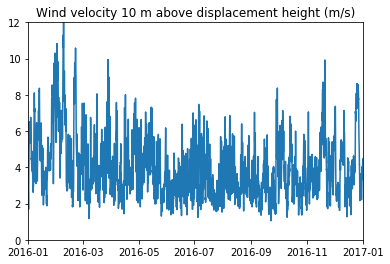

In [22]:
# create plot
plt.plot(weather.index, weather['DE_windspeed_10m'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)

(0, 1000)

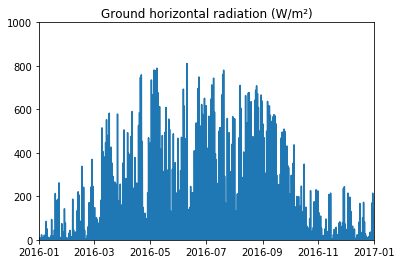

In [23]:
# create plot
plt.plot(weather.index, weather['DE_radiation_direct_horizontal'])
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)

(-10, 40)

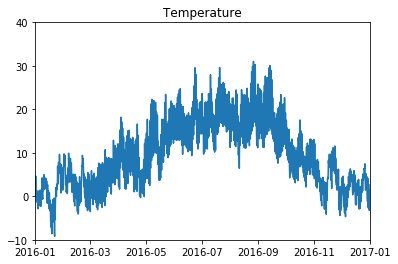

In [27]:
# create plot
plt.plot(weather.index, weather['DE_temperature'])
plt.title('Temperature')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(-10, 40)

In [29]:
#merging datasets

combined = pd.merge(production, weather, how='left', left_index=True, right_index=True)
combined.head()

,cet_cest_timestamp,interpolated_values,DE_solar_generation_actual,DE_wind_generation_actual,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01T01:00:00+0100,NaN,0,8579,3.384917,2.064,0.0,0.0,1.73,2.05,...,0.0,0.0,4.66,3.16,0.0,0.0,3.22,0.21,0.0,0.0
2016-01-01 01:00:00,2016-01-01T02:00:00+0100,NaN,0,8542,3.363631,1.965,0.0,0.0,1.73,1.84,...,0.0,0.0,4.39,2.95,0.0,0.0,3.22,0.23,0.0,0.0
2016-01-01 02:00:00,2016-01-01T03:00:00+0100,NaN,0,8443,3.326812,1.887,0.0,0.0,1.74,1.72,...,0.0,0.0,4.12,2.82,0.0,0.0,3.36,0.27,0.0,0.0
2016-01-01 03:00:00,2016-01-01T04:00:00+0100,NaN,0,8295,3.279600,1.885,0.0,0.0,1.73,1.82,...,0.0,0.0,4.06,2.78,0.0,0.0,3.46,0.30,0.0,0.0
2016-01-01 04:00:00,2016-01-01T05:00:00+0100,NaN,0,7319,3.170454,1.866,0.0,0.0,1.77,1.95,...,0.0,0.0,4.18,2.80,0.0,0.0,3.47,0.24,0.0,0.0


In [35]:
#removing unneeded columns
combined = combined.filter(like='DE_')
combined.head()

,DE_solar_generation_actual,DE_wind_generation_actual,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,,,
2016-01-01 00:00:00,0,8579,3.384917,2.064,0.0,0.0
2016-01-01 01:00:00,0,8542,3.363631,1.965,0.0,0.0
2016-01-01 02:00:00,0,8443,3.326812,1.887,0.0,0.0
2016-01-01 03:00:00,0,8295,3.279600,1.885,0.0,0.0
2016-01-01 04:00:00,0,7319,3.170454,1.866,0.0,0.0


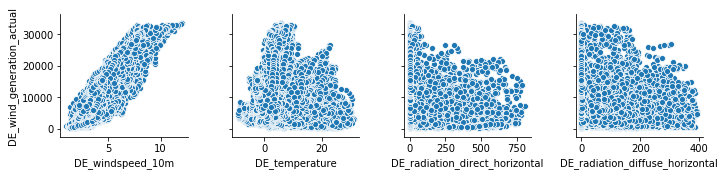

In [36]:
sns.pairplot(combined, x_vars=['DE_windspeed_10m', 'DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal'], y_vars=['DE_wind_generation_actual'])

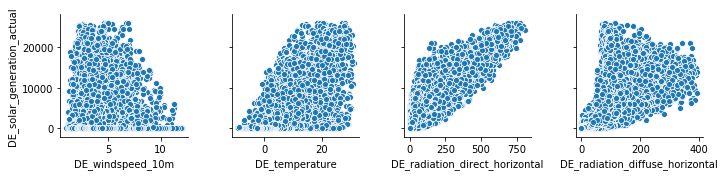

In [37]:
sns.pairplot(combined, x_vars=['DE_windspeed_10m', 'DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal'], y_vars=['DE_solar_generation_actual'])

C:\Users\madat\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


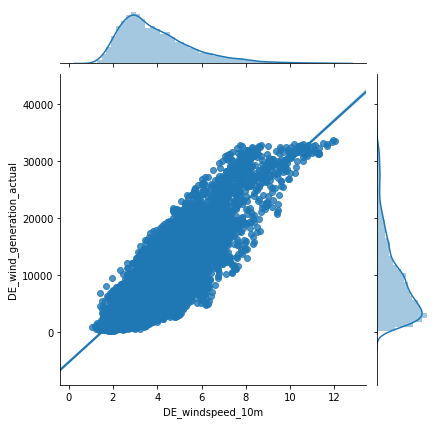

In [38]:
sns.jointplot(x='DE_windspeed_10m', y='DE_wind_generation_actual', data=combined, kind='reg')

In [39]:
X_solar = combined[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']]
y_solar = combined['DE_solar_generation_actual']

In [42]:
scores_solar = cross_val_score(lr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').